# CFD -- Advection-Diffusion Equation
## Kelsey Malloy

### <i>last edited: 09/2020</i>

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt

### Functions

In [12]:
def func(x):
    return np.maximum(0,1-4*(x**2))

In [35]:
def fd(u,dx,order):
    # assume periodicity
    
    ux = np.zeros(u.shape)
    
    if order == 1: # FORWARD EULER
        ux[:-1] = (u[1:] - u[:-1])/dx
        ux[-1] = ux[0] # periodic
    
    elif order == -1: # BACKWARD EULER
        ux[1:] = (u[1:] - u[:-1])/dx
        ux[0] = ux[-1] # periodic
        
    elif order == 2: # CENTERED DIFF, 2nd order
        ux[1:-1] = (u[2:]-u[:-2]) / (2*dx)       
        ux[0] = (u[1]-u[-2]) / (2*dx) 
        ux[-1] = (u[1]-u[-2]) / (2*dx)
        
    return ux

In [14]:
def rhsadv(u,c,dx,order):
    ux = fd(u,dx,order) # compute deriv
    r = -c*ux
    return r

In [38]:
def rk1(u,c,diffusion,dx,order,dt):
    r=rhsadv(u,c,dx,order)
    u = u + dt*r
    return u

In [16]:
def rk3(u,xpts,dx,mu,periodic):
    
    u[1:] = u[1:] - mu*(u[1:]-u[0:-1])
    if periodic==1:
        u[0] = u[0] - mu*(u[0]-u[-1])
    #return u

In [54]:
def plotfig(xpts,u,t,color):
    # plot time update
    timestr=str(t)
    #if t==0:
    fig = plt.figure(1,figsize=[16,8])
    ax1 = fig.add_subplot(121)
    ax1.set_title('Advection Equation Solution')
    ax1.set_xlim([-1,1])
    #ax1.set_ylim([-2,2])
    if t>0:
        ax1.plot(xpts,before,'k',label='$u^0$')
    ax1.plot(xpts,u,'r',label='$u^{'+str(t)+'}$')
    ax1.legend(loc=1)

### Define the grid

In [42]:
xmin,xmax=-1,1
nx=64
dx=(xmax-xmin)/nx  # grid spacing
xpts = np.linspace(xmin,xmax,nx) # cell edges excluding halos
print(dx)

0.03125


### Define the integratation time & number of steps

In [43]:
mu = 0.5
c = 1.
diffusion = 0.
dt = mu*dx/c
print(dt)
nt = (xmax-xmin)/c/dt
print(nt)
order = -1

0.015625
128.0


### Time-stepping

initial conditions

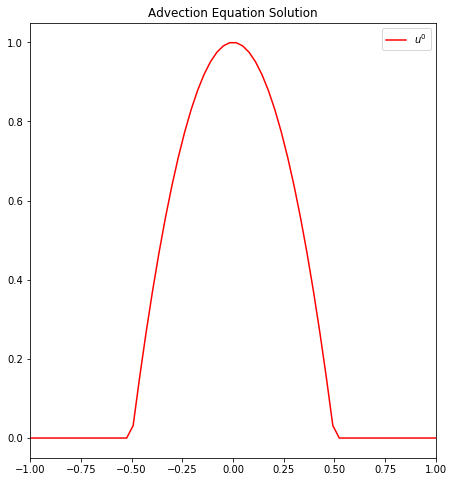

In [55]:
u = func(xpts)
plotfig(xpts,u,0,'k')

time updates

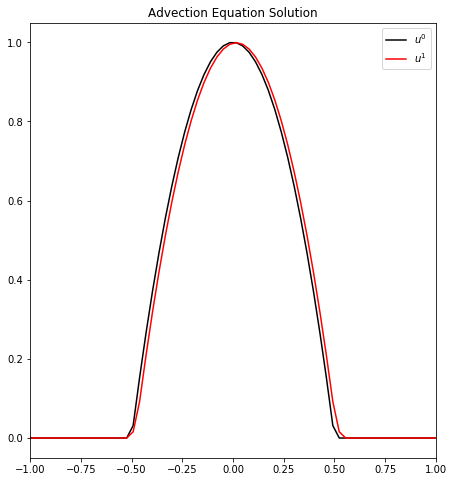

In [56]:
before=u
u = rk1(u,c,diffusion,dx,order,dt)
plotfig(xpts,u,1,'r')

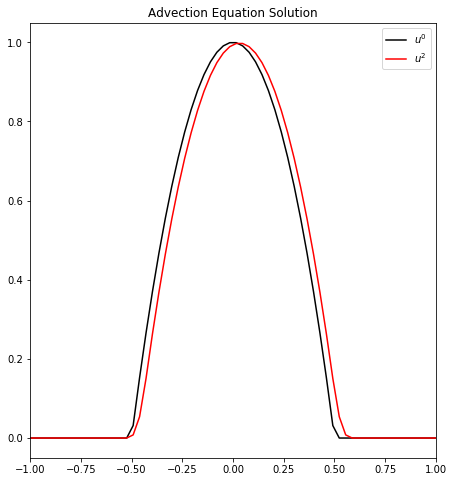

In [57]:
u = rk1(u,c,diffusion,dx,order,dt)
plotfig(xpts,u,2,'b')

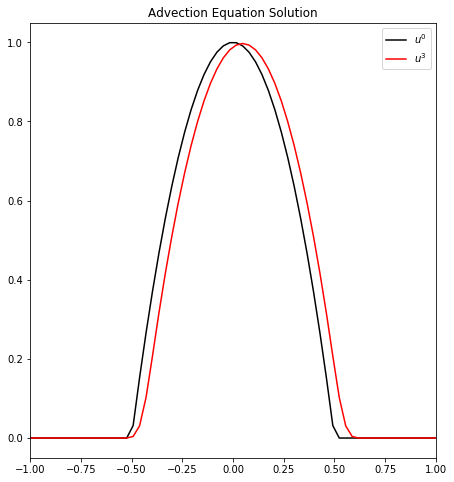

In [58]:
u = rk1(u,c,diffusion,dx,order,dt)
plotfig(xpts,u,3,'b')

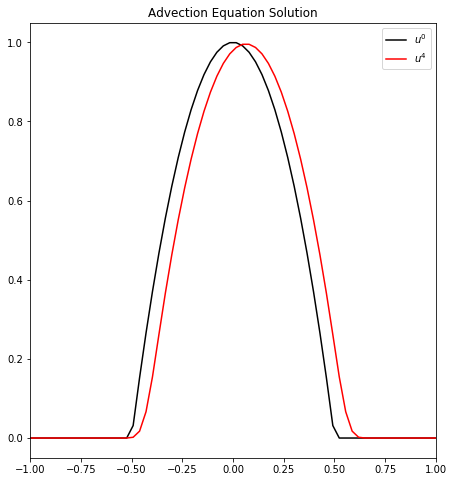

In [59]:
u = rk1(u,c,diffusion,dx,order,dt)
plotfig(xpts,u,4,'b')